# Kev's Stolen Dom's Notebook

hypothesis:

(01/09/20)
- Taxo ID [7,8] fall into Exec and consult
- taxo ID [3,4,5,9] fall into specialists
- Taxo ID [1,2,6] are further divided by experience level
        - we weren't satisfied on the results of this grouping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import ttest_ind

import sys
sys.path.append('../')
import wrangle


In [2]:
df, dictdf = wrangle.wrangle_data()
df.head()

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,2,3,2,2,2,NaN,research-practice connections,NaN,research-practice connections,2
288,Academic,4,1.0,1,2,1,3,3,3,3,...,3,3,1,1,2,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2
294,Academic,4,1.0,3,3,1,3,1,3,3,...,2,2,2,2,2,NaN,NaN,NaN,Looking forward! \n,2
281,Academic,4,1.0,3,4,0,2,3,2,0,...,3,2,2,3,2,NaN,"Research design, innovative methods, communica...",NaN,NaN,2
280,Academic,4,1.0,3,3,0,1,1,3,2,...,3,2,1,2,2,You should consider the combination of confere...,NaN,NaN,NaN,2


- Checking freds nlp functions

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 284 to 2
Data columns (total 78 columns):
job_title                         726 non-null category
job_taxo                          726 non-null category
job_id                            723 non-null category
job_conduct_res                   726 non-null int64
job_analyze_res                   726 non-null int64
job_buy_res_report                726 non-null int64
job_manage_res_proj               726 non-null int64
job_observe_res                   726 non-null int64
job_plan_res                      726 non-null int64
job_teach_res                     726 non-null int64
job_advocate_res                  726 non-null int64
job_hire_res_vendor               726 non-null int64
job_lead_res_team                 726 non-null int64
num_employees                     723 non-null category
num_researchers                   722 non-null category
primary_industry                  726 non-null category
types_res_used               

In [4]:
# mat, vect = nlp.create_tfidf_matrix(df.best_event)

#### Exploration

In [5]:
#Quantitative columns
quant_cols = df.select_dtypes([int,float]).columns
quant_cols.to_list()

['job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_workshop',
 'learning_conference',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_conference',
 'likely_workshop',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_network',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'factor_ability_to_pay',
 'ideal_multi_track',
 'ideal_single_track',
 'ideal_unconference',
 'session_keynote',
 'session_long_

In [6]:
#Jobs by taxo id
    #1 is UX researchers
    #2 is Developers
    #3 is Researcher/Scientist
    #4 is Academic/Students
    #5 is Planners?
    #6 is Design/Research Managers
    #7 is Consultans
    #8 is Executive
    #9 is misc
df.groupby(['job_taxo', 'job_title']).job_title.count()

job_taxo  job_title              
1         Principal UX Researcher     38
          Senior UX Researcher        82
          UX Researcher              167
2         Principal UX Designer       22
          Senior UX Designer          21
          UX Designer                 66
3         Analyst                      5
          Anthropologist               3
          Behavioral economist         1
          Ethnographer                 1
          Market Researcher            3
          Research Scientist           1
          Researcher                   9
4         Academic                    20
          Student                      3
5         Content Strategist           4
          Engineer                    13
          Information Architect       10
          Product Manager              7
          Service Designer            10
          Strategist                  21
6         Design Manager              54
          Research Manager            59
7         Consultant   

In [7]:
df.groupby(['persona_id','job_taxo']).persona_id.count()

persona_id  job_taxo
1           7            49
            8            45
2           3            23
            4            23
            5            65
            9            12
3           1            87
            2            21
            6            72
4           1           162
            2            61
            6            38
5           1            38
            2            27
            6             3
Name: persona_id, dtype: int64

In [8]:
df.persona_id.value_counts()

4    261
3    180
2    123
1     94
5     68
Name: persona_id, dtype: int64

In [9]:
exp_cols = ['exp_conduct_res', 'exp_analyze_res',
           'exp_buy_res_report', 'exp_manage_res_proj', 'exp_observe_res',
           'exp_plan_res', 'exp_teach_res', 'exp_advocate_res',
           'exp_hire_res_vendor', 'exp_lead_res_team']
df[exp_cols].mean(axis = 1)

resp_id
284    5.0
288    4.7
294    3.6
281    0.6
280    2.0
      ... 
869    0.6
879    1.0
136    2.4
74     1.5
2      1.3
Length: 726, dtype: float64

In [10]:
#show distributions of values


In [11]:
#establish features and target and split train and test data


In [12]:
x = quant_cols.drop(['likely_conference','learning_conference']).to_list()+['persona_id', 'job_taxo']
y = 'target'

In [13]:
# df['target'] = df[['learning_conference','likely_conference']].apply('mean', axis = 1)

In [14]:
learning_conference_int = np.array(df['learning_conference'] >1).astype('int32')
likely_conference_int = np.array(df['likely_conference']>1).astype('int32')
df['target'] = learning_conference_int + likely_conference_int

In [15]:

df['target']

resp_id
284    2
288    2
294    2
281    2
280    2
      ..
869    0
879    1
136    0
74     1
2      2
Name: target, Length: 726, dtype: int32

In [16]:
train, test = train_test_split(df[x+[y]].dropna(subset = [y]))

In [17]:
#1/14/20
#use svm or 
#form hypothesis and test them

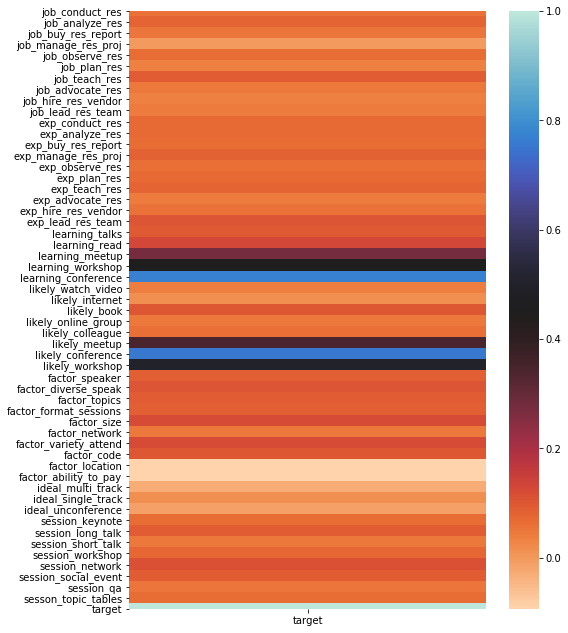

In [18]:
plt.figure(figsize=(8,11))
sns.heatmap(df.corr()[['target']], cmap = 'icefire_r')
plt.show()

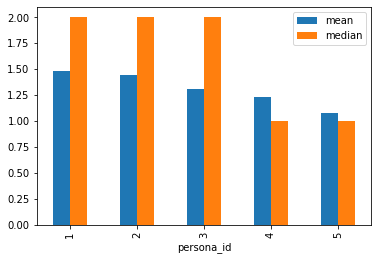

In [19]:
df.groupby('persona_id').target.agg(['mean', 'median']).plot.bar()
plt.show()
# df.groupby('persona_id').likely_conference.count()

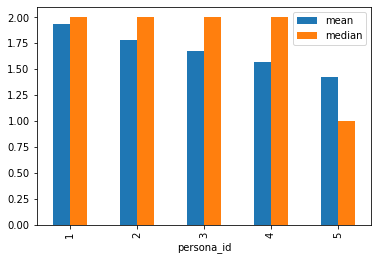

In [20]:
df.groupby('persona_id').learning_conference.agg(['mean', 'median']).plot.bar()
plt.show()


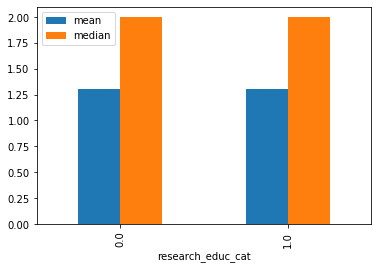

In [21]:
df.groupby('research_educ_cat').target.agg(['mean', 'median']).plot.bar()
plt.show()

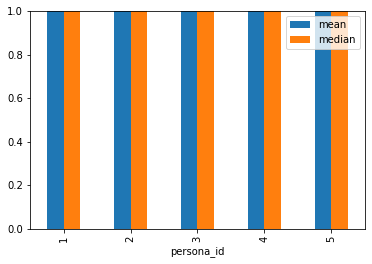

persona_id
1     94
2    123
3    180
4    261
5     68
Name: target, dtype: int64

In [22]:
df.groupby('persona_id').target.agg(['mean', 'median']).plot.bar()
plt.ylim(0,1)
plt.show()
df.groupby('persona_id').target.count()


persona_id 1


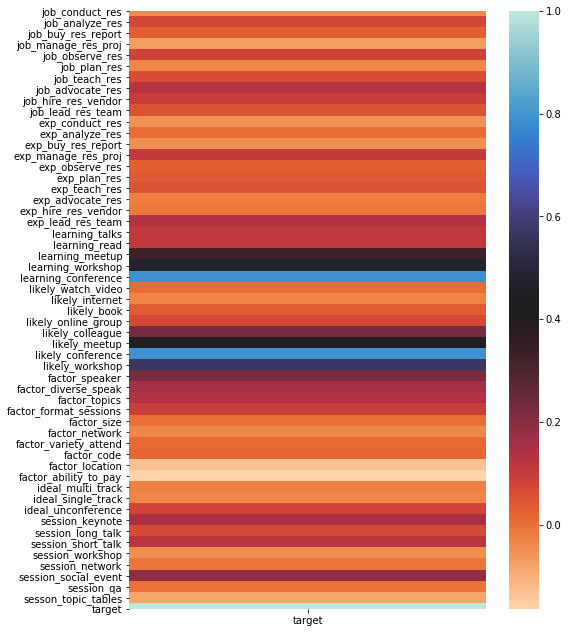

persona_id 2


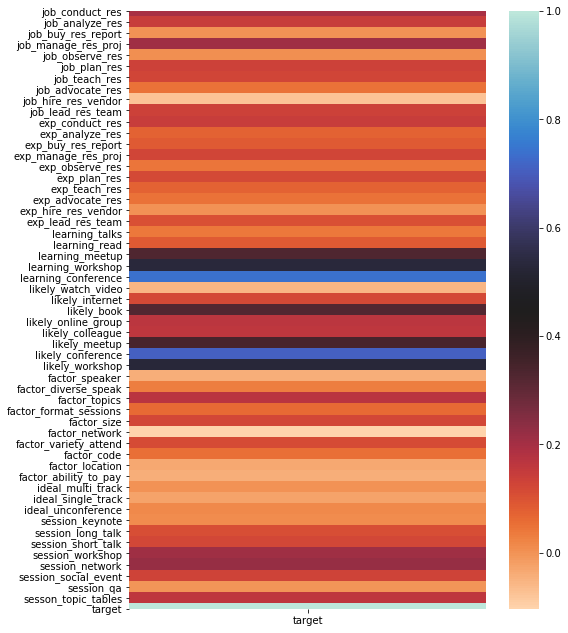

persona_id 3


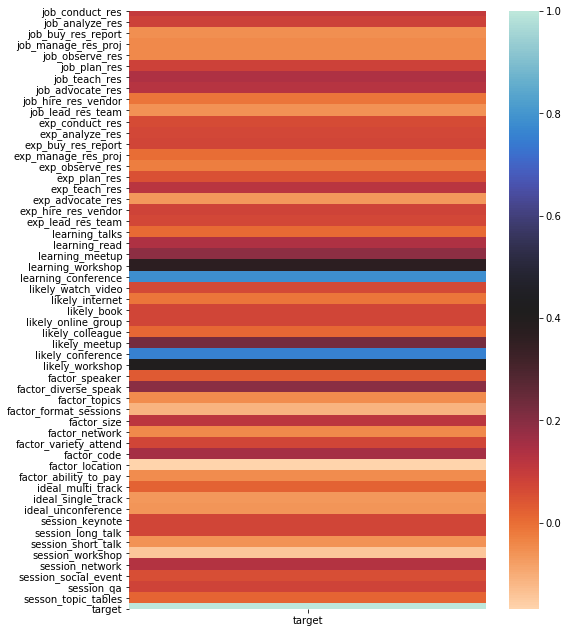

persona_id 4


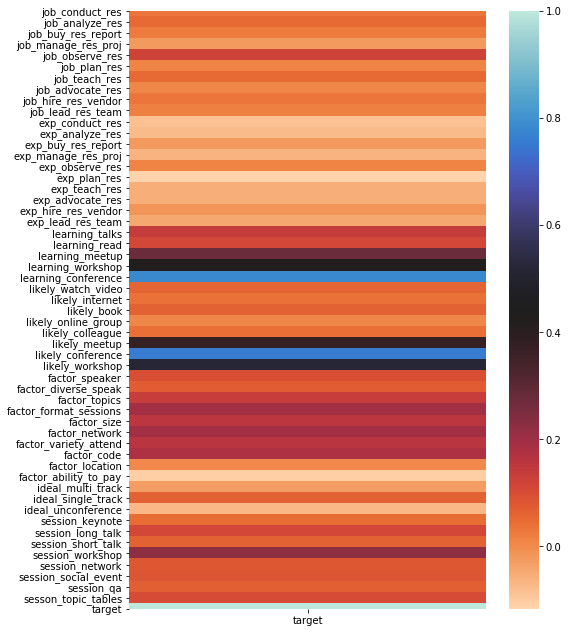

persona_id 5


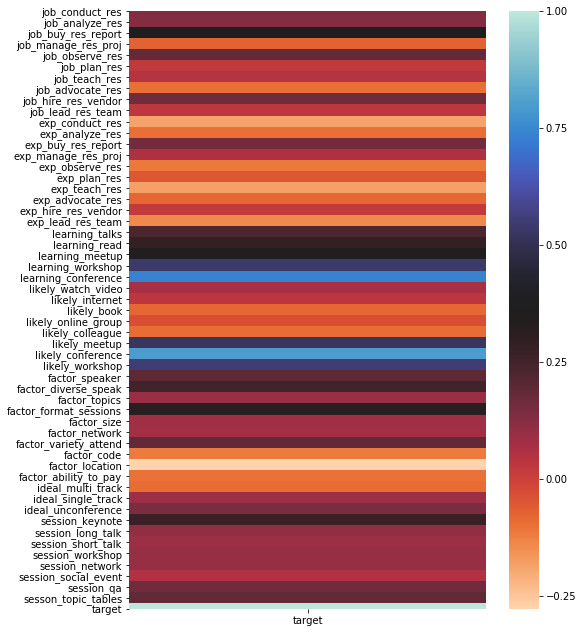

In [23]:
for i in set(df.persona_id.to_list()):
    print('persona_id',i)
    plt.figure(figsize=(8,11))
    sns.heatmap(df[df.persona_id==i].corr()[['target']], cmap = 'icefire_r')
    plt.show()

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,2.856749,1.025941,0.0,3.0,3.0,4.0,4.0
job_analyze_res,726.0,2.913223,0.939210,0.0,3.0,3.0,3.0,4.0
job_buy_res_report,726.0,0.402204,0.720686,0.0,0.0,0.0,1.0,4.0
job_manage_res_proj,726.0,2.600551,1.166285,0.0,2.0,3.0,3.0,4.0
job_observe_res,726.0,1.982094,1.134273,0.0,1.0,2.0,3.0,4.0
job_plan_res,726.0,2.931129,0.950177,0.0,3.0,3.0,4.0,4.0
job_teach_res,726.0,1.845730,1.236637,0.0,1.0,2.0,3.0,4.0
job_advocate_res,726.0,2.924242,1.056235,0.0,3.0,3.0,4.0,4.0
job_hire_res_vendor,726.0,0.776860,0.914143,0.0,0.0,1.0,1.0,4.0
job_lead_res_team,726.0,1.860882,1.486931,0.0,0.0,2.0,3.0,4.0


In [25]:
recoder_dictionary = {
    "important5": 'r5to3',
    "likely5": 'r5to3',
    "often4": 'r4to2',
    "often5": 'r5to3',
    "tenure6": 'r6to3',
}

In [26]:
recoder = {
    'r5to3': {
        0: 0,
        1: 0,
        2: .5,
        3: 1,
        4: 1,
    },
    'r4to2': {
        0: 0,
        1: 0,
        2: 1,
        3: 1,
    },
    'r6to3': {
        0: 0,
        1: 0,
        2: .5,
        3: .5,
        4: 1,
        5: 1,
    },
}

In [27]:
# Get mapping dictionary
def get_recoder_dictionary(data_dictionary, recoder_dictionary):
    recodes = [recode for recode in recoder_dictionary]
    recode_df = data_dictionary[['column_name','encoder']].dropna()
    recode_df['col'] = recode_df.column_name
    recode_df=recode_df.set_index('column_name')
    recode_df = recode_df[recode_df.encoder.isin(recodes)]
    recode_df['recoder'] = recode_df.encoder.apply(lambda x: recoder_dictionary[x])
    return recode_df


def recode_columns(df, recode_df, recoder):
    '''
    '''
    allcols=recode_df.col
    check_dicts=recode_df.recoder
    cols=[chkcol for chkcol in allcols if chkcol in df.columns]
    for col in cols:
        use_dict = recoder[check_dicts[col]]
        encoded = df[col].apply(lambda x: use_dict[x])
        df[col] = encoded
    return df

In [28]:
check_recoder = get_recoder_dictionary(dictdf, recoder_dictionary)

In [29]:
dfrecode = recode_columns(df, check_recoder, recoder)
dfrecode

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,...,1.0,0.5,0.5,0.5,NaN,research-practice connections,NaN,research-practice connections,2,2
288,Academic,4,1.0,0.0,0.5,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.5,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,2
294,Academic,4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.5,0.5,0.5,0.5,NaN,NaN,NaN,Looking forward! \n,2,2
281,Academic,4,1.0,1.0,1.0,0.0,0.5,1.0,0.5,0.0,...,0.5,0.5,1.0,0.5,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,2
280,Academic,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,...,0.5,0.0,0.5,0.5,You should consider the combination of confere...,NaN,NaN,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,UX Researcher,1,28.0,1.0,1.0,0.0,0.0,1.0,0.0,0.5,...,1.0,1.0,1.0,1.0,none,collaboration with teams,"big and small companies, seeing the scale at w...",provide tools and resources and support for ne...,5,0
879,UX Researcher,1,28.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.5,0.5,0.0,0.0,NaN,"A research team of 1, How to deal with a lot o...",NaN,Make it affordable. Somewhere in Europe. :),4,1
136,UX Researcher,1,28.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,"masterclasses, full day talks/trainings - whi...",how to tackle typical research problems (e.g p...,"personal friends, a variety of people - not ju...","My goal is to provide constructive criticism, ...",3,0


In [30]:
dfrecode.describe().T

,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,0.811295,0.372591,0.0,1.0,1.0,1.0,1.0
job_analyze_res,726.0,0.840220,0.343342,0.0,1.0,1.0,1.0,1.0
job_buy_res_report,726.0,0.045455,0.180038,0.0,0.0,0.0,0.0,1.0
job_manage_res_proj,726.0,0.715565,0.416908,0.0,0.5,1.0,1.0,1.0
job_observe_res,726.0,0.488292,0.455844,0.0,0.0,0.5,1.0,1.0
job_plan_res,726.0,0.835399,0.340548,0.0,1.0,1.0,1.0,1.0
job_teach_res,726.0,0.457300,0.463385,0.0,0.0,0.5,1.0,1.0
job_advocate_res,726.0,0.811983,0.352500,0.0,1.0,1.0,1.0,1.0
job_hire_res_vendor,726.0,0.111570,0.294695,0.0,0.0,0.0,0.0,1.0
job_lead_res_team,726.0,0.460744,0.463318,0.0,0.0,0.5,1.0,1.0


In [31]:
def scale_col(df, col, tgt_values=3, col_min=None, col_max=None):
    chk = df[[col]].copy()
    chk_col = chk[col]
#     print('Min:', col_min, 'Max:', col_max)
    if col_min is None:
        col_min = chk_col.min()
#     print('Min:', col_min, 'Max:', col_max)
    if col_max is None:
        col_max = chk_col.max()
#     print('Min:', col_min, 'Max:', col_max)
    if col_min == col_max:
#         print('values not possible')
        return chk_col
    col_range = col_max - col_min
#     print('Range:', col_range)
    adj_col = np.array(chk_col) - col_min
    adj_col = np.around((adj_col * (tgt_values - 1)) / col_range)
    chk['adj'] = adj_col
    return chk.adj

In [32]:
scale_job_teach_res = scale_col(df, 'job_teach_res')
scale_job_teach_res.value_counts().sort_index()

0.0    345
1.0     98
2.0    283
Name: adj, dtype: int64

In [33]:
df.job_teach_res.value_counts().sort_index()

0.0    345
0.5     98
1.0    283
Name: job_teach_res, dtype: int64

In [34]:
scale_exp_conduct_res = scale_col(df, 'exp_conduct_res')
scale_exp_conduct_res.value_counts().sort_index()

0.0    128
1.0    230
2.0    368
Name: adj, dtype: int64

In [35]:
df.exp_conduct_res.value_counts().sort_index()

0.0    128
0.5    230
1.0    368
Name: exp_conduct_res, dtype: int64

In [36]:
scale_learning_workshop = scale_col(df, 'learning_workshop')
scale_learning_workshop.value_counts().sort_index()

0.0    383
2.0    343
Name: adj, dtype: int64

In [37]:
df.learning_workshop.value_counts().sort_index()

0    383
1    343
Name: learning_workshop, dtype: int64

Text(0.5, 1, 'Statistical difference between persona groups of likelyhood to attend a conference')

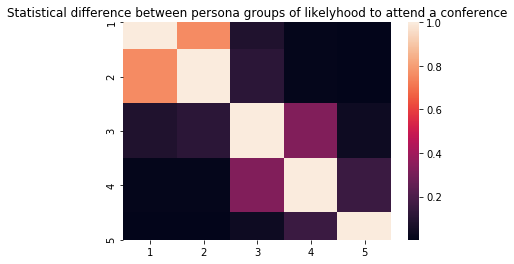

In [38]:
ttests = {}
row = {}
for i in range(1,6):
    for j in range(1,6):
        ttests[j] = ttest_ind(df[df.persona_id == i].target,df[(df.persona_id == j)].target, nan_policy='omit')[1]
    row[i] = ttests.copy()
sns.heatmap(pd.DataFrame(row))
plt.title('Statistical difference between persona groups of likelyhood to attend a conference')

In [39]:
pd.DataFrame(row)

,1,2,3,4,5
1,1.000000,0.761731,0.084177,0.010404,0.001563
2,0.761731,1.000000,0.115110,0.012002,0.001343
3,0.084177,0.115110,1.000000,0.328983,0.039677
4,0.010404,0.012002,0.328983,1.000000,0.155563
5,0.001563,0.001343,0.039677,0.155563,1.000000


In [40]:
tree = DecisionTreeRegressor(max_depth=1000, random_state=123)
tree.fit(train[x], train[y])
predicted = tree.predict(test[x]) 


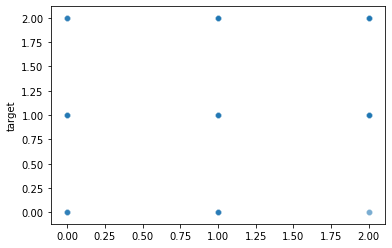

In [41]:
sns.scatterplot(predicted, test[y], alpha=.2)

In [42]:
reg = LinearRegression()
reg.fit(train[x], train[y])
predicted = reg.predict(test[x])

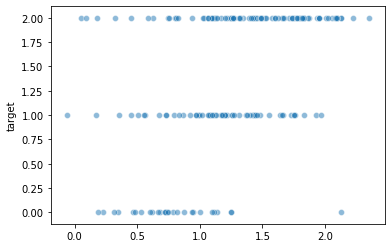

In [43]:
sns.scatterplot(predicted, test[y],alpha = .5)

In [44]:
session_pref = (
    df
    .groupby(by='persona_id')[
        'session_keynote',
        'session_long_talk',
        'session_short_talk',
        'session_workshop',
        'session_network',
        'session_social_event',
        'session_qa',
        'sesson_topic_tables',
    ].mean()
)

In [45]:
session_pref

,session_keynote,session_long_talk,session_short_talk,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables
persona_id,,,,,,,,
1,0.664894,0.776596,0.659574,0.824468,0.680851,0.335106,0.553191,0.686170
2,0.764228,0.764228,0.621951,0.792683,0.548780,0.357724,0.544715,0.626016
3,0.711111,0.780556,0.655556,0.788889,0.580556,0.375000,0.486111,0.636111
4,0.796935,0.819923,0.651341,0.814176,0.477011,0.304598,0.567050,0.691571
5,0.852941,0.786765,0.661765,0.904412,0.610294,0.433824,0.647059,0.742647
